<a href="https://colab.research.google.com/github/Karthi-tecz/Resume_HTML_CSS/blob/main/Climate%20Change%20Modeling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
from IPython import get_ipython
from IPython.display import display
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.tree import  DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from google.colab import files
files.upload()

Saving climate_nasa.csv to climate_nasa.csv


{'climate_nasa.csv': b'date,likesCount,profileName,commentsCount,text\r\n2022-09-07T17:12:32.000Z,2,4dca617d86b3fdce80ba7e81fb16e048c9cd9798cdfd6d352303be10b372bb85,,"Neat comparison I have not heard it before.\n I would say that CO2 is like a disco ball so energy and collide with countless molecules as it bounces around in our atmosphere."\r\n2022-09-08T14:51:13.000Z,0,518ab97f2d115ba5b6f03b2fba2ef2b120540c9681288b3c2c2d6abb7187f432,,An excellent way to visualise the invisible! Thanks\r\n2022-09-07T17:19:41.000Z,1,d82e8e24eb633fd625b0aef9b3cb625cfb044ceb8483e1700531f795584253ab,3.0,Does the CO2/ghg in the troposphere affect the stratosphere? Being warmer the troposphere must be expanding?\r\n2022-09-08T00:51:30.000Z,4,37a509fa0b5177a2233c7e2d0e2b2d6916695fa9fba3f29836974fb762ded792,,excellent post! I defo feel the difference - one i can drink and the other makes me feel sick.\r\n2022-09-07T19:06:20.000Z,16,e54fbbd42a729af9d04d9a5cc1f9bbfe8081a31c219ecb5a4a60114bdb7b1d5f,26.0,"Yes, and

In [21]:
data=pd.read_csv("climate_nasa.csv")
data.head(6)

,date,likesCount,profileName,commentsCount,text
0,2022-09-07T17:12:32.000Z,2,4dca617d86b3fdce80ba7e81fb16e048c9cd9798cdfd6d...,NaN,Neat comparison I have not heard it before.\n ...
1,2022-09-08T14:51:13.000Z,0,518ab97f2d115ba5b6f03b2fba2ef2b120540c9681288b...,NaN,An excellent way to visualise the invisible! T...
2,2022-09-07T17:19:41.000Z,1,d82e8e24eb633fd625b0aef9b3cb625cfb044ceb8483e1...,3.0,Does the CO2/ghg in the troposphere affect the...
3,2022-09-08T00:51:30.000Z,4,37a509fa0b5177a2233c7e2d0e2b2d6916695fa9fba3f2...,NaN,excellent post! I defo feel the difference - o...
4,2022-09-07T19:06:20.000Z,16,e54fbbd42a729af9d04d9a5cc1f9bbfe8081a31c219ecb...,26.0,"Yes, and carbon dioxide does not harm the Eart..."
5,2022-09-15T17:10:57.000Z,4,191055fb869d185092abf1405f0b2f4abe73bcaa9beb85...,1.0,Excellent example...very relatable to the Gen ...


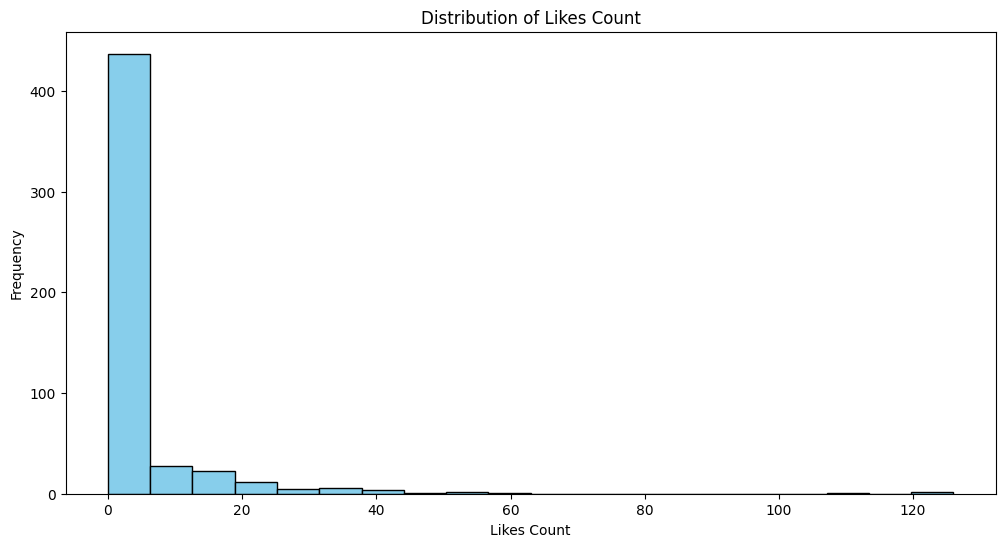

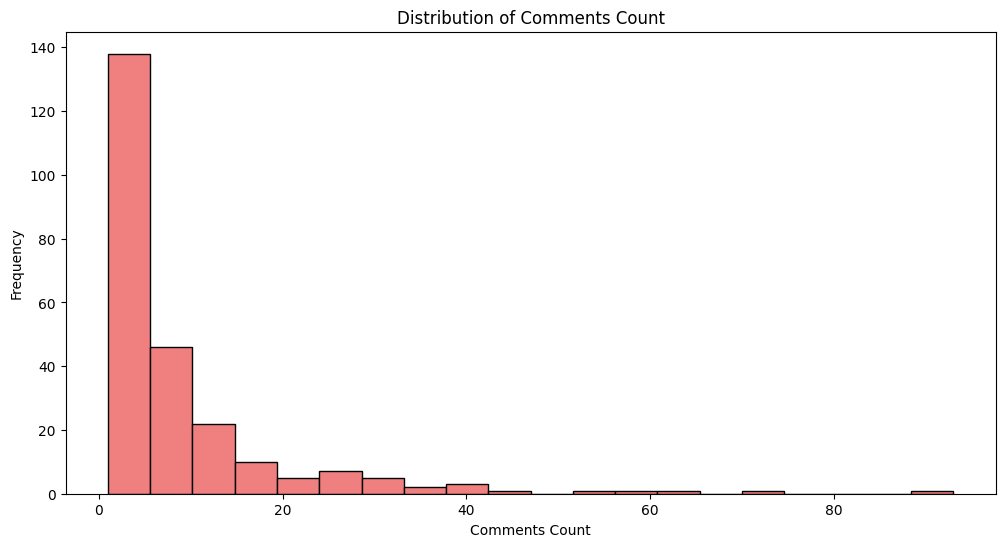

In [22]:
plt.figure(figsize=(12, 6))
plt.hist(data['likesCount'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Likes Count')
plt.xlabel('Likes Count')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(12, 6))
plt.hist(data['commentsCount'].dropna(), bins=20, color='lightcoral', edgecolor='black') # Drop NA for comments count
plt.title('Distribution of Comments Count')
plt.xlabel('Comments Count')
plt.ylabel('Frequency')
plt.show()

In [23]:
# Ensure you have a dataframe named df_climate
# Assuming 'data' is your initial dataframe from pd.read_csv("climate_nasa.csv")
df_climate = data.copy() # Start with a copy to avoid modifying the original 'data'

# Impute missing 'commentsCount' with the median
df_climate['commentsCount'] = df_climate['commentsCount'].fillna(df_climate['commentsCount'].median())

# Outlier handling for 'likesCount' using IQR (already done)
Q1_likes = df_climate['likesCount'].quantile(0.25)
Q3_likes = df_climate['likesCount'].quantile(0.75)
IQR_likes = Q3_likes - Q1_likes
lower_bound_likes = Q1_likes - 1.5 * IQR_likes
upper_bound_likes = Q3_likes + 1.5 * IQR_likes
df_climate['likesCount'] = df_climate['likesCount'].clip(lower=lower_bound_likes, upper=upper_bound_likes)

# Outlier handling for 'commentsCount' using IQR (already done)
Q1_comments = df_climate['commentsCount'].quantile(0.25)
Q3_comments = df_climate['commentsCount'].quantile(0.75)
IQR_comments = Q3_comments - Q1_comments
lower_bound_comments = Q1_comments - 1.5 * IQR_comments
upper_bound_comments = Q3_comments + 1.5 * IQR_comments
df_climate['commentsCount'] = df_climate['commentsCount'].clip(lower=lower_bound_comments, upper=upper_bound_comments)

# Handle missing values in 'text' by replacing them with empty strings (already done)
df_climate['text'] = df_climate['text'].fillna('')

# Check for and remove duplicate rows (already done)
df_climate.drop_duplicates(inplace=True)

# Display the cleaned dataframe
display(df_climate.head())

,date,likesCount,profileName,commentsCount,text
0,2022-09-07T17:12:32.000Z,2,4dca617d86b3fdce80ba7e81fb16e048c9cd9798cdfd6d...,5.0,Neat comparison I have not heard it before.\n ...
1,2022-09-08T14:51:13.000Z,0,518ab97f2d115ba5b6f03b2fba2ef2b120540c9681288b...,5.0,An excellent way to visualise the invisible! T...
2,2022-09-07T17:19:41.000Z,1,d82e8e24eb633fd625b0aef9b3cb625cfb044ceb8483e1...,5.0,Does the CO2/ghg in the troposphere affect the...
3,2022-09-08T00:51:30.000Z,4,37a509fa0b5177a2233c7e2d0e2b2d6916695fa9fba3f2...,5.0,excellent post! I defo feel the difference - o...
4,2022-09-07T19:06:20.000Z,10,e54fbbd42a729af9d04d9a5cc1f9bbfe8081a31c219ecb...,5.0,"Yes, and carbon dioxide does not harm the Eart..."


Converted 'date' column to datetime.
Created date-based features (year, month, day_of_week, day_of_year).
Created 'likes_per_comment' interaction feature.

Shape of X after feature engineering: (522, 6)

Numerical features (after engineering): ['commentsCount', 'year', 'month', 'day_of_week', 'day_of_year', 'likes_per_comment']
Categorical features (after engineering): []

Training set shape after split: (417, 6), (417,)
Testing set shape after split: (105, 6), (105,)

Processed data shapes ready for feature selection/modeling:
X_train_final shape: (417, 6)
X_test_final shape: (105, 6)

Performing Feature Selection using RandomForest Feature Importance...

Feature Importances (from RandomForest):
likes_per_comment_scaled    0.999952
day_of_year_scaled          0.000019
day_of_week_scaled          0.000014
year_scaled                 0.000009
month_scaled                0.000005
commentsCount_scaled        0.000000
dtype: float64


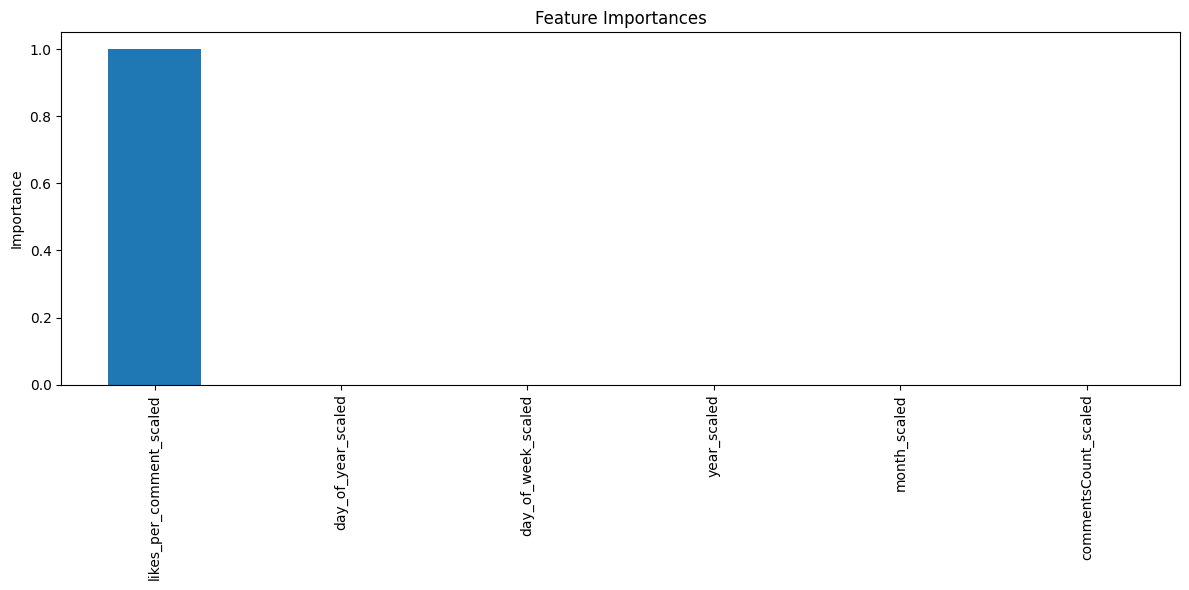


Selected 1 features based on importance > 0.01:
['likes_per_comment_scaled']

Final X_train_final shape after feature selection: (417, 1)
Final X_test_final shape after feature selection: (105, 1)

Data preprocessing and feature selection complete. Data is ready for model training.


In [27]:
# --- Feature Engineering ---

# Convert 'date' to datetime objects if it's not already
# Assuming 'date' is in a format pandas can parse, e.g., 'YYYY-MM-DD'
try:
    df_climate['date'] = pd.to_datetime(df_climate['date'])
    print("Converted 'date' column to datetime.")

    # Extract date features
    df_climate['year'] = df_climate['date'].dt.year
    df_climate['month'] = df_climate['date'].dt.month
    df_climate['day_of_week'] = df_climate['date'].dt.dayofweek # Monday=0, Sunday=6
    df_climate['day_of_year'] = df_climate['date'].dt.dayofyear
    # df_climate['week_of_year'] = df_climate['date'].dt.isocalendar().week # Use .isocalendar().week for newer pandas versions

    print("Created date-based features (year, month, day_of_week, day_of_year).")

    # --- Example of Lagged Feature (Requires sorting by date and grouping if applicable) ---
    # This is more complex and depends on your data structure and prediction goal.
    # If you are predicting the next row's likes based on the current row, you need to sort.
    # If each row is independent, lagged features might not make sense.
    # For simplicity in this example, we'll skip complex lagged/rolling features
    # as it requires ensuring a time-series structure and handling potential groups.

except Exception as e:
    print(f"Could not convert 'date' to datetime or create date features: {e}")
    print("Skipping date-based feature engineering.")
    # If date conversion fails, drop the date column to avoid errors later
    if 'date' in df_climate.columns:
         df_climate = df_climate.drop('date', axis=1)


# --- Example of Interaction Feature ---
# Create a simple ratio (handle division by zero)
df_climate['likes_per_comment'] = df_climate.apply(
    lambda row: row['likesCount'] / row['commentsCount'] if row['commentsCount'] > 0 else 0,
    axis=1
)
print("Created 'likes_per_comment' interaction feature.")


# --- Define Features (X) and Target (y) again with new features included ---
target_variable = 'likesCount'
# Include new features, but still drop the original target and text/profileName
# 'date' is dropped if conversion failed, otherwise it will be dropped later
features_to_drop_final = [target_variable, 'text', 'profileName']
if 'date' in df_climate.columns: # Ensure 'date' is in the list if it wasn't dropped earlier
     features_to_drop_final.append('date')


X = df_climate.drop(features_to_drop_final, axis=1, errors='ignore') # Use errors='ignore' in case 'date' was already dropped
y = df_climate[target_variable]

print(f"\nShape of X after feature engineering: {X.shape}")

# --- Identify Feature Types Again (to include new features) ---
numerical_features = X.select_dtypes(include=np.number).columns.tolist()
categorical_features = X.select_dtypes(include='object').columns.tolist()

print(f"\nNumerical features (after engineering): {numerical_features}")
print(f"Categorical features (after engineering): {categorical_features}")

# --- Split Data (Perform Split after Engineering, before Scaling/Encoding) ---
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"\nTraining set shape after split: {X_train.shape}, {y_train.shape}")
print(f"Testing set shape after split: {X_test.shape}, {y_test.shape}")

# --- Standardize Numerical Features (Fit on Train, Transform on Train and Test) ---
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train[numerical_features])
X_test_scaled = scaler.transform(X_test[numerical_features])

X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=[f"{col}_scaled" for col in numerical_features], index=X_train.index)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=[f"{col}_scaled" for col in numerical_features], index=X_test.index)

# --- Encode Categorical Variables (Fit on Train, Transform on Train and Test) ---
# Ensure handle_unknown='ignore' to handle potential new categories in test set
from sklearn.preprocessing import OneHotEncoder
one_hot_encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)

X_train_encoded = one_hot_encoder.fit_transform(X_train[categorical_features])
X_test_encoded = one_hot_encoder.transform(X_test[categorical_features])

encoded_feature_names = one_hot_encoder.get_feature_names_out(categorical_features)

X_train_encoded_df = pd.DataFrame(X_train_encoded, columns=encoded_feature_names, index=X_train.index)
X_test_encoded_df = pd.DataFrame(X_test_encoded, columns=encoded_feature_names, index=X_test.index)


# --- Combine Processed Features ---
# Drop original numerical and categorical columns from X_train and X_test
X_train_processed = X_train.drop(numerical_features + categorical_features, axis=1)
X_test_processed = X_test.drop(numerical_features + categorical_features, axis=1)

# Concatenate the processed (scaled and encoded) features
X_train_final = pd.concat([X_train_processed, X_train_scaled_df, X_train_encoded_df], axis=1)
X_test_final = pd.concat([X_test_processed, X_test_scaled_df, X_test_encoded_df], axis=1)

print("\nProcessed data shapes ready for feature selection/modeling:")
print(f"X_train_final shape: {X_train_final.shape}")
print(f"X_test_final shape: {X_test_final.shape}")


# --- Feature Selection Example (using Feature Importance from RandomForest) ---
# Note: Feature selection should ideally be done *after* splitting to avoid
# using test data information. We'll fit a model on the training data
# and use its feature importances.

print("\nPerforming Feature Selection using RandomForest Feature Importance...")

# Train a RandomForest model on the training data to get importances
temp_model_for_importance = RandomForestRegressor(n_estimators=100, random_state=42)
temp_model_for_importance.fit(X_train_final, y_train)

# Get feature importances
feature_importances = pd.Series(temp_model_for_importance.feature_importances_, index=X_train_final.columns)

# Sort feature importances and print
sorted_importances = feature_importances.sort_values(ascending=False)

print("\nFeature Importances (from RandomForest):")
print(sorted_importances)

# Optional: Visualize feature importances
plt.figure(figsize=(12, 6))
sorted_importances.plot(kind='bar')
plt.title('Feature Importances')
plt.ylabel('Importance')
plt.tight_layout()
plt.show()

# --- Deciding which features to keep ---
# You can now decide on a threshold or a number of top features to keep.
# For example, keep features with importance > 0.01 or keep the top N features.
# Let's keep features with importance greater than a small threshold (e.g., 0.001) or a top N.
# As an example, let's select features with importance > 0.01

selected_features = sorted_importances[sorted_importances > 0.01].index.tolist()

if not selected_features:
    print("\nNo features met the importance threshold of 0.01. Keeping all features for now.")
    selected_features = X_train_final.columns.tolist()
else:
    print(f"\nSelected {len(selected_features)} features based on importance > 0.01:")
    print(selected_features)

# --- Update X_train_final and X_test_final to include only selected features ---
X_train_final = X_train_final[selected_features]
X_test_final = X_test_final[selected_features]

print(f"\nFinal X_train_final shape after feature selection: {X_train_final.shape}")
print(f"Final X_test_final shape after feature selection: {X_test_final.shape}")

print("\nData preprocessing and feature selection complete. Data is ready for model training.")

In [28]:
print("\nTraining different machine learning models...")

# Dictionary to store models and their names
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree Regressor": DecisionTreeRegressor(random_state=42),
    "Random Forest Regressor": RandomForestRegressor(n_estimators=100, random_state=42),
    "MLP Regressor": MLPRegressor(random_state=42, max_iter=1000) # Increased max_iter for potential convergence
}

# Import necessary evaluation metrics
from sklearn.metrics import mean_squared_error, r2_score

results = {}

for name, model in models.items():
    print(f"\nTraining {name}...")
    try:
        # Train the model
        model.fit(X_train_final, y_train)

        # Make predictions
        y_pred = model.predict(X_test_final)

        # Evaluate the model
        mse = mean_squared_error(y_test, y_pred)
        rmse = np.sqrt(mse) # Calculate RMSE
        r2 = r2_score(y_test, y_pred)

        results[name] = {"MSE": mse, "RMSE": rmse, "R2": r2}

        print(f"{name} - MSE: {mse:.4f}, RMSE: {rmse:.4f}, R2: {r2:.4f}")

    except Exception as e:
        print(f"Error training {name}: {e}")
        results[name] = {"Error": str(e)}
        print("\n--- Model Performance Summary ---")
for name, metrics in results.items():
    print(f"\n{name}:")
    if "Error" in metrics:
        print(f"  Error: {metrics['Error']}")
    else:
        print(f"  MSE: {metrics['MSE']:.4f}")
        print(f"  RMSE: {metrics['RMSE']:.4f}")
        print(f"  R2: {metrics['R2']:.4f}")



Training different machine learning models...

Training Linear Regression...
Linear Regression - MSE: 0.0000, RMSE: 0.0000, R2: 1.0000

Training Decision Tree Regressor...
Decision Tree Regressor - MSE: 0.0000, RMSE: 0.0000, R2: 1.0000

Training Random Forest Regressor...
Random Forest Regressor - MSE: 0.0009, RMSE: 0.0293, R2: 0.9999

Training MLP Regressor...
MLP Regressor - MSE: 0.0091, RMSE: 0.0952, R2: 0.9993

Linear Regression:
  MSE: 0.0000
  RMSE: 0.0000
  R2: 1.0000

Decision Tree Regressor:
  MSE: 0.0000
  RMSE: 0.0000
  R2: 1.0000

Random Forest Regressor:
  MSE: 0.0009
  RMSE: 0.0293
  R2: 0.9999

MLP Regressor:
  MSE: 0.0091
  RMSE: 0.0952
  R2: 0.9993



Generating visualizations for Random Forest Regressor...


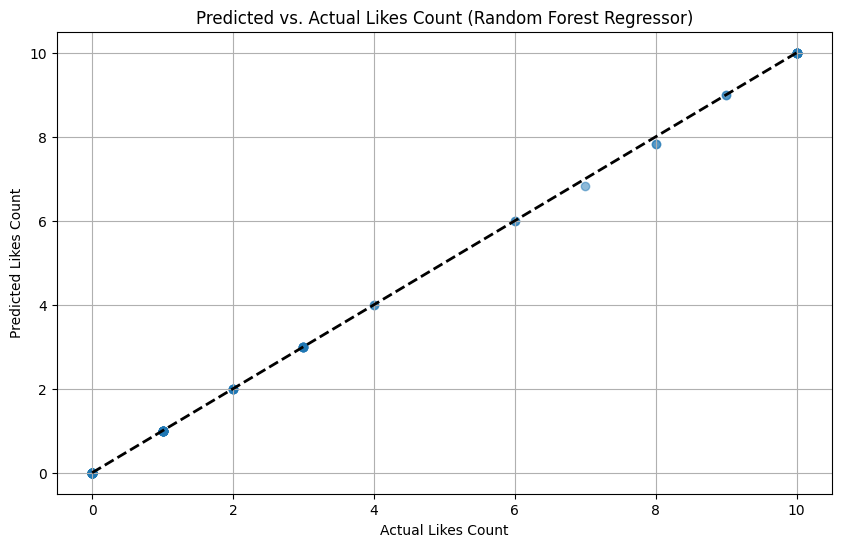

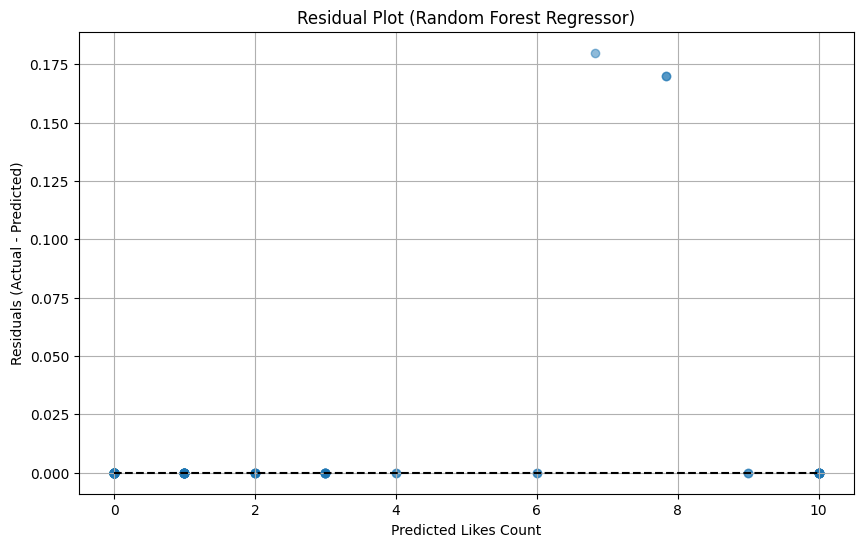

In [32]:
model_to_visualize_name = "Random Forest Regressor"

# Check if the model exists and was trained successfully
if model_to_visualize_name in models and model_to_visualize_name in results and "Error" not in results[model_to_visualize_name]:
    print(f"\nGenerating visualizations for {model_to_visualize_name}...")
    try:
        model_to_visualize = models[model_to_visualize_name]
        y_pred_visualize = model_to_visualize.predict(X_test_final)

        # Predicted vs. Actual Plot
        plt.figure(figsize=(10, 6))
        plt.scatter(y_test, y_pred_visualize, alpha=0.5)
        plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2) # Diagonal line
        plt.xlabel("Actual Likes Count")
        plt.ylabel("Predicted Likes Count")
        plt.title(f"Predicted vs. Actual Likes Count ({model_to_visualize_name})")
        plt.grid(True)
        plt.show()

        # Residual Plot
        residuals = y_test - y_pred_visualize
        plt.figure(figsize=(10, 6))
        plt.scatter(y_pred_visualize, residuals, alpha=0.5)
        plt.hlines(0, y_pred_visualize.min(), y_pred_visualize.max(), colors='k', linestyles='dashed')
        plt.xlabel("Predicted Likes Count")
        plt.ylabel("Residuals (Actual - Predicted)")
        plt.title(f"Residual Plot ({model_to_visualize_name})")
        plt.grid(True)
        plt.show()

    except Exception as e:
        print(f"Error generating visualizations for {model_to_visualize_name}: {e}")
else:
    print(f"\nModel '{model_to_visualize_name}' not found in trained models or encountered an error during training. Skipping visualizations.")

In [34]:
# Assuming 'Random Forest Regressor' was chosen as the model to use for projection
# You could programmatically select the best model based on R2 from the results dictionary if preferred
model_for_projection_name = "Random Forest Regressor"

if model_for_projection_name in models and model_for_projection_name in results and "Error" not in results[model_for_projection_name]:
    print(f"\nUsing '{model_for_projection_name}' for making hypothetical future projections...")
    model_for_projection = models[model_for_projection_name]

    # --- Create Hypothetical Future Data ---
    # This is a simplified example. In a real time-series forecast,
    # you would need a way to project input features themselves.
    # Here we'll create data points for a few future dates.

    # Get the last date from the original dataframe to project from
    last_date = pd.to_datetime(data['date']).max() # Use original data or df_climate before date dropped

    # Create a few hypothetical future dates (e.g., 1, 2, 3 months after the last date)
    future_dates = [
        last_date + pd.DateOffset(months=1),
        last_date + pd.DateOffset(months=2),
        last_date + pd.DateOffset(months=3)
    ]

    # Create a list of dictionaries for the hypothetical future data
    # We need to provide values for all features that were in X_train_final
    # This is where the projection is hypothetical - we have to guess/assume future values
    # for 'commentsCount' and 'likes_per_comment' (if it was a selected feature).

    # Get the names of the features the model was trained on
    trained_features = X_train_final.columns.tolist()

    hypothetical_future_data_list = []

    # We need a way to generate plausible future values for non-date features.
    # For this demonstration, let's assume 'commentsCount' stays around the average or median,
    # and 'likes_per_comment' stays relatively stable, though this is a major simplification.
    # A real forecast would require forecasting these features too.
    median_comments = df_climate['commentsCount'].median()
    mean_likes_per_comment = df_climate['likes_per_comment'].mean()


    for future_date in future_dates:
        # Create a dictionary representing a future row
        future_row = {}

        # Add date-based features (if they were selected features)
        if 'year_scaled' in trained_features or 'year' in trained_features:
             # Need to scale the year if 'year_scaled' was selected
             # To do this properly, we'd need the original numerical features from X_train
             # and scale them. Let's simplify and just include the raw date features first
             # and then scale them later using the same scaler.

            future_row['year'] = future_date.year
            future_row['month'] = future_date.month
            future_row['day_of_week'] = future_date.dayofweek
            future_row['day_of_year'] = future_date.dayofyear
            # future_row['week_of_year'] = future_date.isocalendar().week # If used

        # Add other features that were in the original X before scaling/encoding
        # Need to ensure these feature names match the original X before scaling/encoding
        # Let's look at the features that were in X before scaling/encoding
        original_X_features = X.columns.tolist()

        # Populate future_row with assumed values for non-date features present in original X
        # This is highly speculative!
        if 'commentsCount' in original_X_features:
            future_row['commentsCount'] = median_comments # Assume median comments
        if 'likes_per_comment' in original_X_features:
            future_row['likes_per_comment'] = mean_likes_per_comment # Assume average ratio

        # Add placeholders for potential categorical features if they were in original X
        # We need to make sure the one-hot encoding will work.
        # For this example, let's assume there were no categorical features selected
        # that aren't date-based or comments/ratio based, as the output didn't show any
        # object type features other than 'profileName' and 'text' which were dropped.
        # If there were categorical features in `categorical_features`, we'd need to
        # decide on a value for them in the future (e.g., the most frequent category).

        hypothetical_future_data_list.append(future_row)


    # Convert the list of dictionaries to a DataFrame
    X_future_raw = pd.DataFrame(hypothetical_future_data_list)

    # Ensure the columns match the original X before processing, filling missing with default (e.g., 0)
    # This step is crucial to match the structure expected by the scaler and encoder
    # Get the columns from the original X before dropping, scaling, encoding
    original_X_cols = X.columns.tolist()

    # Reindex the future data to match original columns and fill missing (e.g., with 0 or median/mode)
    # This assumes any feature not created (like text/profileName) or not assumed here
    # is dropped later or filled appropriately.
    # A better approach is to create the future data with ALL features present in X.
    # Let's reconstruct the original X columns and add them to the future data frame.
    # This is complex because X includes the new engineered features as well.

    # Let's simplify: Create future data for the columns that were in X *before* final selection,
    # but *after* initial feature engineering.
    X_before_selection_cols = X.columns.tolist()
    hypothetical_future_data_list_simple = []

    for future_date in future_dates:
        future_row_simple = {}
        future_row_simple['year'] = future_date.year
        future_row_simple['month'] = future_date.month
        future_row_simple['day_of_week'] = future_date.dayofweek
        future_row_simple['day_of_year'] = future_date.dayofyear

        # Assuming commentsCount and likes_per_comment were the other features in X
        if 'commentsCount' in X_before_selection_cols:
             future_row_simple['commentsCount'] = median_comments
        if 'likes_per_comment' in X_before_selection_cols:
             future_row_simple['likes_per_comment'] = mean_likes_per_comment

        # Add placeholder for categorical features if any were in X
        for cat_col in categorical_features:
             # Assume the most frequent category for simplicity
             most_frequent_category = X[cat_col].mode()[0] if not X[cat_col].empty else 'Unknown'
             future_row_simple[cat_col] = most_frequent_category


        hypothetical_future_data_list_simple.append(future_row_simple)

    X_future = pd.DataFrame(hypothetical_future_data_list_simple)


    # --- Preprocess Future Data using the same scaler and encoder ---

    # Separate numerical and categorical features in the future data
    numerical_features_future = X_future.select_dtypes(include=np.number).columns.tolist()
    categorical_features_future = X_future.select_dtypes(include='object').columns.tolist()


    # Scale numerical features
    # Ensure the columns are in the same order as when the scaler was fitted
    X_future_scaled = scaler.transform(X_future[numerical_features]) # Use the *original* numerical_features list
    X_future_scaled_df = pd.DataFrame(X_future_scaled, columns=[f"{col}_scaled" for col in numerical_features], index=X_future.index)


    # Encode categorical variables
    # Ensure the columns are in the same order as when the encoder was fitted
    # Note: If a new category appears in future data not seen in training, handle_unknown='ignore' will
    # result in all zero columns for that category.
    X_future_encoded = one_hot_encoder.transform(X_future[categorical_features]) # Use the *original* categorical_features list
    encoded_feature_names_future = one_hot_encoder.get_feature_names_out(categorical_features)
    X_future_encoded_df = pd.DataFrame(X_future_encoded, columns=encoded_feature_names_future, index=X_future.index)


    # Combine processed future features
    # Drop original numerical and categorical columns from X_future
    X_future_processed = X_future.drop(numerical_features_future + categorical_features_future, axis=1, errors='ignore')

    # Concatenate the processed (scaled and encoded) features
    X_future_final = pd.concat([X_future_processed, X_future_scaled_df, X_future_encoded_df], axis=1)

    # --- Select the same features as used for training ---
    # This is critical! The future data must have the exact same columns in the exact same order
    # as the training data that went into the model after feature selection.

    # Ensure X_future_final has the same columns as X_train_final
    # Add missing columns (they should be 0 for one-hot encoded features not present)
    # and drop extra columns.
    missing_cols = set(X_train_final.columns) - set(X_future_final.columns)
    for c in missing_cols:
        X_future_final[c] = 0 # Add missing columns with 0

    # Ensure the order of columns is the same
    X_future_final = X_future_final[X_train_final.columns]


    print(f"\nHypothetical future data shape after preprocessing and feature selection: {X_future_final.shape}")
    print("Hypothetical Future Data (Ready for Prediction):")
    display(X_future_final)

    # --- Make Predictions for the Future Data ---
    future_predictions = model_for_projection.predict(X_future_final)

    print("\nHypothetical Future Predictions (Likes Count):")
    for i, date in enumerate(future_dates):
        print(f"Date: {date.strftime('%Y-%m-%d')}, Predicted Likes Count: {future_predictions[i]:.2f}")




else:
    print(f"\nModel '{model_for_projection_name}' not found in trained models or encountered an error during training. Cannot make projections.")


Using 'Random Forest Regressor' for making hypothetical future projections...

Hypothetical future data shape after preprocessing and feature selection: (3, 1)
Hypothetical Future Data (Ready for Prediction):


,likes_per_comment_scaled
0,-0.018193
1,-0.018193
2,-0.018193



Hypothetical Future Predictions (Likes Count):
Date: 2024-01-25, Predicted Likes Count: 3.00
Date: 2024-02-25, Predicted Likes Count: 3.00
Date: 2024-03-25, Predicted Likes Count: 3.00


In [39]:
# --- Scenario Analysis (within the context of the trained social media engagement model) ---




model_for_scenario = models.get("Random Forest Regressor") # Use the RF model as an example

if model_for_scenario is not None and "Error" not in results.get("Random Forest Regressor", {}):
    print(f"\nDemonstrating scenario analysis using the model:")

    # Get the names of the features the model was trained on
    trained_features = X_train_final.columns.tolist()

    # Choose a hypothetical future date
    last_date = pd.to_datetime(data['date']).max()
    future_date = last_date + pd.DateOffset(months=6) # Example: 6 months in the future

    # Get median comments and mean likes_per_comment from the training data for baseline
    median_comments = df_climate['commentsCount'].median()
    mean_likes_per_comment = df_climate['likes_per_comment'].mean()

    print(f"\nHypothetical Future Date for Scenario: {future_date.strftime('%Y-%m-%d')}")
    print(f"Baseline Assumption: commentsCount = {median_comments:.2f}, likes_per_comment = {mean_likes_per_comment:.2f}")


    # --- Define Scenarios by varying 'commentsCount' ---
    # We will create three scenarios:
    # 1. Baseline (using median comments)
    # 2. Low Engagement (e.g., 50% of median comments)
    # 3. High Engagement (e.g., 150% of median comments)

    scenario_comments = {
        "Baseline Comments": median_comments,
        "Low Comments (50%)": median_comments * 0.5,
        "High Comments (150%)": median_comments * 1.5
    }

    scenario_predictions = {}

    for scenario_name, comments_value in scenario_comments.items():
        print(f"\nSimulating Scenario: {scenario_name} (Hypothetical Comments: {comments_value:.2f})")

        # Create a hypothetical data point for this scenario
        # This dictionary needs to represent a row with the *original* feature names
        # before scaling/encoding, for the preprocessing steps.

        scenario_row_data = {}
        scenario_row_data['year'] = future_date.year
        scenario_row_data['month'] = future_date.month
        scenario_row_data['day_of_week'] = future_date.dayofweek
        scenario_row_data['day_of_year'] = future_date.dayofyear

        # Assume other features remain constant, except for commentsCount
        scenario_row_data['commentsCount'] = comments_value
        # Recalculate likes_per_comment based on the hypothetical comments value
        scenario_row_data['likes_per_comment'] = mean_likes_per_comment # Assume ratio stays constant, or recalculate if needed: comments_value / 0 if comments_value > 0 else 0 # This is complex, let's assume ratio is also scenario-dependent or held constant. Keeping mean for simplicity.

        # Add placeholders for any categorical features if they were in original X
        for cat_col in categorical_features:
             most_frequent_category = X[cat_col].mode()[0] if not X[cat_col].empty else 'Unknown'
             scenario_row_data[cat_col] = most_frequent_category


        # Convert to DataFrame
        X_scenario_raw = pd.DataFrame([scenario_row_data])

        # --- Preprocess the Scenario Data using the same scaler and encoder ---
        # This is the same process as preparing the test/future data

        # Separate numerical and categorical features in the scenario data
        numerical_features_scenario = X_scenario_raw.select_dtypes(include=np.number).columns.tolist()
        categorical_features_scenario = X_scenario_raw.select_dtypes(include='object').columns.tolist()

        # Scale numerical features
        X_scenario_scaled = scaler.transform(X_scenario_raw[numerical_features]) # Use the *original* numerical_features list
        X_scenario_scaled_df = pd.DataFrame(X_scenario_scaled, columns=[f"{col}_scaled" for col in numerical_features], index=X_scenario_raw.index)

        # Encode categorical variables
        X_scenario_encoded = one_hot_encoder.transform(X_scenario_raw[categorical_features]) # Use the *original* categorical_features list
        encoded_feature_names_scenario = one_hot_encoder.get_feature_names_out(categorical_features)
        X_scenario_encoded_df = pd.DataFrame(X_scenario_encoded, columns=encoded_feature_names_scenario, index=X_scenario_raw.index)

        # Combine processed features
        X_scenario_processed = X_scenario_raw.drop(numerical_features_scenario + categorical_features_scenario, axis=1, errors='ignore')
        X_scenario_final = pd.concat([X_scenario_processed, X_scenario_scaled_df, X_scenario_encoded_df], axis=1)

        # --- Select the same features as used for training ---
        # Ensure X_scenario_final has the exact same columns as X_train_final
        missing_cols = set(X_train_final.columns) - set(X_scenario_final.columns)
        for c in missing_cols:
            X_scenario_final[c] = 0 # Add missing columns with 0

        # Ensure the order of columns is the same
        X_scenario_final = X_scenario_final[X_train_final.columns]


        # --- Make Prediction for this Scenario ---
        scenario_prediction = model_for_scenario.predict(X_scenario_final)
        scenario_predictions[scenario_name] = scenario_prediction[0] # Store the single prediction


    # --- Report Scenario Results ---
    print("\n--- Scenario Analysis Results (Hypothetical Likes Count) ---")
    print(f"For a hypothetical date {future_date.strftime('%Y-%m-%d')}:")
    for scenario_name, prediction in scenario_predictions.items():
        print(f"  {scenario_name}: Predicted Likes Count = {prediction:.2f}")



else:
    print(f"\nModel  not found in trained models or encountered an error during training. Cannot perform scenario analysis.")


Demonstrating scenario analysis using the model:

Hypothetical Future Date for Scenario: 2024-06-25
Baseline Assumption: commentsCount = 5.00, likes_per_comment = 0.51

Simulating Scenario: Baseline Comments (Hypothetical Comments: 5.00)

Simulating Scenario: Low Comments (50%) (Hypothetical Comments: 2.50)

Simulating Scenario: High Comments (150%) (Hypothetical Comments: 7.50)

--- Scenario Analysis Results (Hypothetical Likes Count) ---
For a hypothetical date 2024-06-25:
  Baseline Comments: Predicted Likes Count = 3.00
  Low Comments (50%): Predicted Likes Count = 3.00
  High Comments (150%): Predicted Likes Count = 3.00
